# 04 - Liner Regression and Minimizing Cost

<img width="200" src="https://i.imgur.com/hbPVe1T.png">

In [1]:
import tensorflow as tf
import numpy as np

## Hypothesis 

$$ H(x) = Wx + b $$

## cost function

$$ cost(W)=\frac { 1 }{ m } \sum _{ i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$

In [2]:
# cost 계산

W = 0
print (((W*1 - 1)**2 + (W*2 - 2)**2 + (W*3 - 3)** 2) / 3)

W = 1
print (((W*1 - 1)**2 + (W*2 - 2)**2 + (W*3 - 3)** 2) / 3)

W = 2
print (((W*1 - 1)**2 + (W*2 - 2)**2 + (W*3 - 3)** 2) / 3)

W = 3
print (((W*1 - 1)**2 + (W*2 - 2)**2 + (W*3 - 3)** 2) / 3)

4.666666666666667
0.0
4.666666666666667
18.666666666666668


In [3]:
data = [
    (1, 1),
    (2, 2),
    (3, 3),
]

def cost_func(w, data):
    s = 0
    m = len(data)
    for v in data:
        s += (w*v[0] - v[1]) ** 2
    return s/m

In [4]:
print( cost_func(0, data) )
print( cost_func(1, data) )
print( cost_func(2, data) )
print( cost_func(3, data) )

4.666666666666667
0.0
4.666666666666667
18.666666666666668


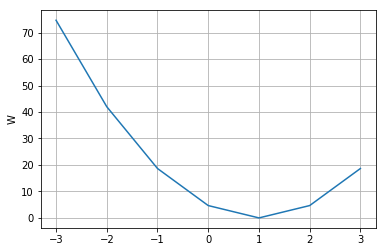

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

w_vals = range(-3, 4)
cost_vals = [cost_func(w, data) for w in w_vals]

plt.plot(w_vals, cost_vals)
plt.ylabel('cost')
plt.ylabel('W')
plt.grid()

# Gradient descent algorithm
* cost를 최소화 하는 대표적인 알고리즘
* 다수의 변수에도 적용이 가능

$$ W\leftarrow W-\alpha \frac { 1 }{ m } \sum _{ i=1 }^{ m }{ (Wx^{ i }-y^{ i })x^{ i } }  $$

* liner regression 의 핵심 알고리즘
* cost function을 설계할때 반드시 convex function 이어야 한다

In [6]:
import tensorflow as tf

x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = W * X + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

a = tf.Variable(0.1) 
optimizer = tf.train.GradientDescentOptimizer(a)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.initializers.global_variables())

for step in range(1000):
    sess.run(train, feed_dict={X: x_data, Y: y_data})
    if step % 100 == 0:
        print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W), sess.run(b))

0 0.22860377 [0.75399375] [0.9258992]
100 0.0008292195 [0.96655506] [0.07602829]
200 6.3845923e-06 [0.99706537] [0.00667125]
300 4.917801e-08 [0.99974245] [0.00058543]
400 3.781461e-10 [0.9999774] [5.1359697e-05]
500 3.0932294e-12 [0.999998] [4.5342836e-06]
600 6.158037e-14 [0.99999976] [6.0832514e-07]
700 0.0 [1.] [5.2014947e-08]
800 0.0 [1.] [5.2014947e-08]
900 0.0 [1.] [5.2014947e-08]


In [7]:
# predict

print(sess.run(hypothesis, feed_dict={X: 5}))
print(sess.run(hypothesis, feed_dict={X: 2.5}))

[5.]
[2.5]
